In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from ruamel import yaml
import os
from load_cppimg import load_img
from MOLLI_fit import *
%matplotlib inline

7it [00:00, 19.45it/s]/home/honght/miniconda3/envs/NUMERICAL/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/honght/undergraduate/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:29: RuntimeWarning: overflow encountered in exp
  return A - B * np.exp(-t / T1)
220it [00:09, 28.26it/s]/home/honght/undergraduate/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:29: RuntimeWarning: overflow encountered in multiply
  return A - B * np.exp(-t / T1)
4096it [02:33, 26.64it/s]


[[1.19323403 1.18060722 1.16980051 ... 1.16527311 1.20626804 1.18491857]
 [1.18846055 1.18489139 1.16253668 ... 1.20404084 1.21402608 1.17673376]
 [1.19829677 1.19496315 1.16660949 ... 1.25108589 1.17071555 1.1553355 ]
 ...
 [1.19331703 1.20466363 1.15827853 ... 1.20258249 1.17056131 1.19927733]
 [1.18924953 1.20418886 1.17846422 ... 1.16934315 1.21001586 1.16659695]
 [1.20000214 5.0613228  0.92791511 ... 1.10826994 0.82755684 0.89758348]]


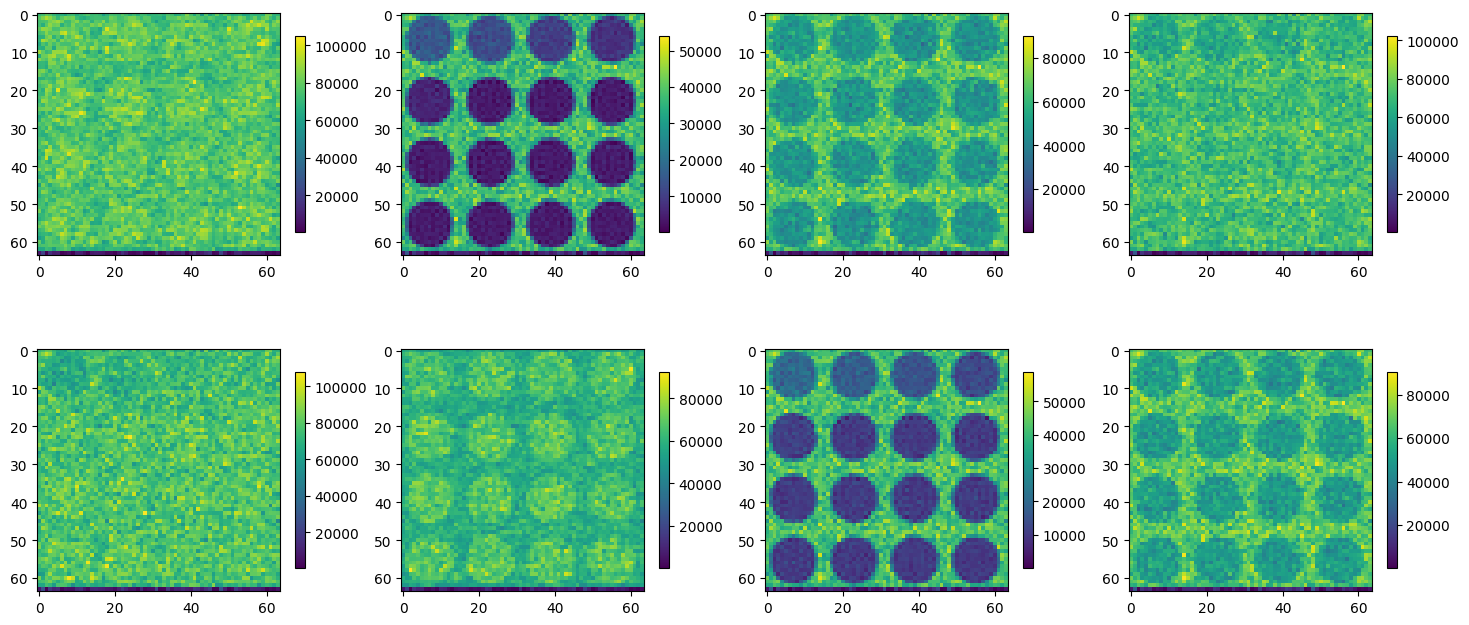

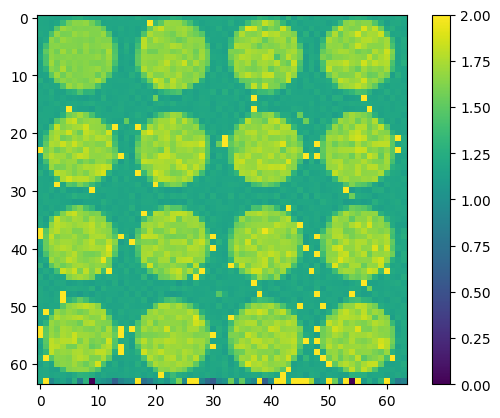

In [2]:
MOLLI_readout_img=[]
MOLLI_readout_t = np.array( [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
for i in range(8):
    MOLLI_readout_img.append(load_img(
        "../exp_result/ID0_Speed_min0.0_max0.029354207436399216",i))
        # "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA35_FOV256_K64_thick8_center_first", i))
        # "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA20_FOV320_K64_center_first", i))
        #  "../img_MOLLI/533_TR2.8_FA20_FOV320_K64_center_first_64^3",i))
        # "../img_MOLLI/533_TR2.8_FA20_FOV320_K64_center_first",i))
MOLLI_readout_img = np.asarray(MOLLI_readout_img)

# print(MOLLI_readout_img[:, 15, 15])

plt.figure(figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(MOLLI_readout_img[i])
    plt.colorbar(shrink=0.7)

T1_result = np.zeros(MOLLI_readout_img[0].shape)

for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
    # T1_star, T1, A, B = MAGIR(
    T1_star, T1, A, B = MF_MAGIR(
        MOLLI_readout_t, MOLLI_readout_img[:, x, y])
    T1_result[x, y] = T1

print(T1_result)

plt.figure()
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0,2)

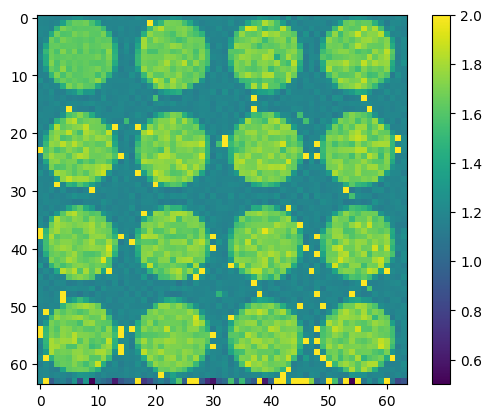

In [6]:
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0.5,2.0)

0it [00:00, ?it/s]/home/honght/miniconda3/envs/NUMERICAL/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
3it [00:00, 21.20it/s]/home/honght/undergraduate/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:29: RuntimeWarning: overflow encountered in exp
  return A - B * np.exp(-t / T1)
455it [00:16, 31.71it/s]/home/honght/undergraduate/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:29: RuntimeWarning: overflow encountered in multiply
  return A - B * np.exp(-t / T1)
4096it [02:33, 26.74it/s]


[[ 1.21933682  1.15090588  1.19807601 ...  1.1600254   1.19573427
   1.157985  ]
 [ 1.18548681  1.24022533  1.16013781 ...  1.18688374  1.18974196
   1.16352786]
 [ 1.20111342  1.16341559 57.8013994  ...  1.1847262   1.19783622
   1.15629311]
 ...
 [ 1.21073584 23.78726485  1.22038854 ...  1.15960465  1.2007281
   1.17334347]
 [ 1.20852634  1.17474699  1.17399014 ...  1.1588023   1.25591047
   1.1618966 ]
 [ 1.03247557  1.85650243  1.0506617  ...  2.54098115  1.01898308
   1.51135135]]


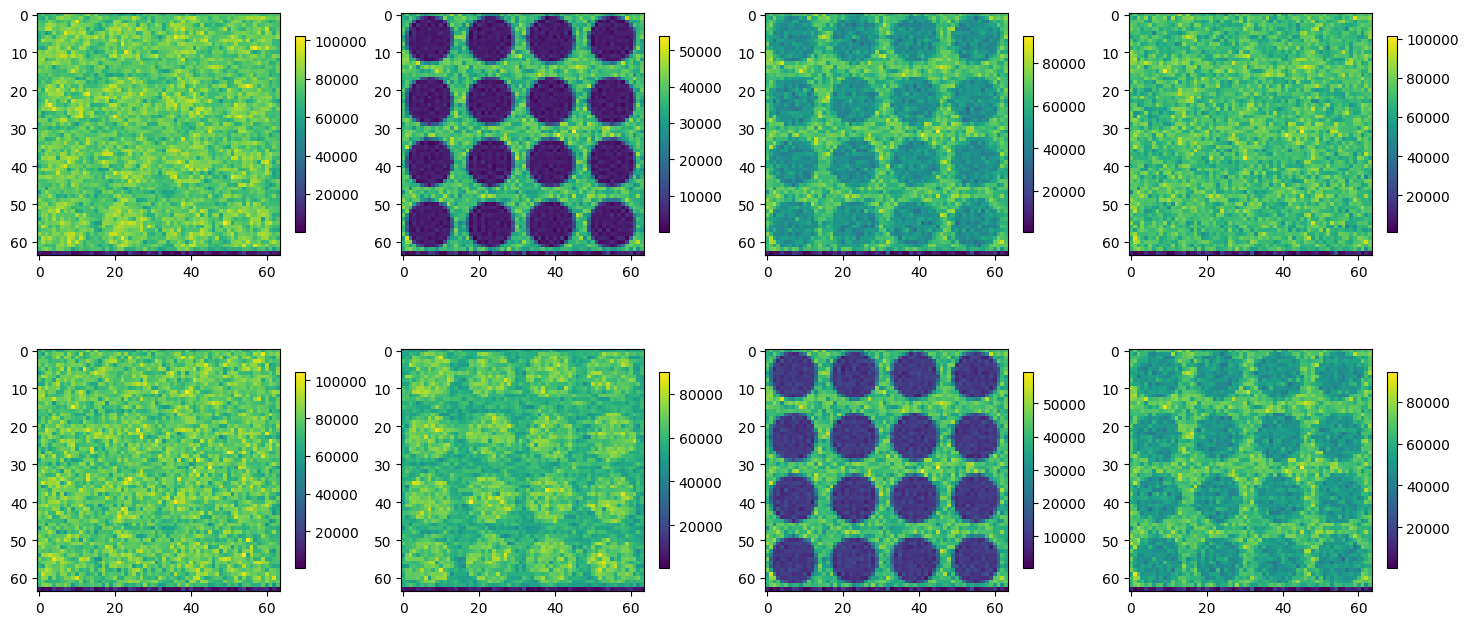

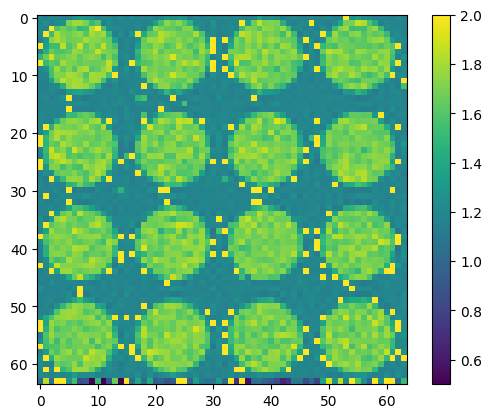

In [7]:
MOLLI_readout_img=[]
MOLLI_readout_t = np.array( [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
for i in range(8):
    MOLLI_readout_img.append(load_img(
        "../exp_result/ID1_Speed_min0.03131115459882583_max0.060665362035225046",i))
        # "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA35_FOV256_K64_thick8_center_first", i))
        # "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA20_FOV320_K64_center_first", i))
        #  "../img_MOLLI/533_TR2.8_FA20_FOV320_K64_center_first_64^3",i))
        # "../img_MOLLI/533_TR2.8_FA20_FOV320_K64_center_first",i))
MOLLI_readout_img = np.asarray(MOLLI_readout_img)

# print(MOLLI_readout_img[:, 15, 15])

plt.figure(figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(MOLLI_readout_img[i])
    plt.colorbar(shrink=0.7)

T1_result = np.zeros(MOLLI_readout_img[0].shape)

for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
    # T1_star, T1, A, B = MAGIR(
    T1_star, T1, A, B = MF_MAGIR(
        MOLLI_readout_t, MOLLI_readout_img[:, x, y])
    T1_result[x, y] = T1

print(T1_result)

plt.figure()
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0.5,2)

0it [00:00, ?it/s]/home/honght/miniconda3/envs/NUMERICAL/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
11it [00:00, 18.52it/s]/home/honght/undergraduate/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:29: RuntimeWarning: overflow encountered in exp
  return A - B * np.exp(-t / T1)
157it [00:05, 38.16it/s]/home/honght/undergraduate/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:29: RuntimeWarning: overflow encountered in multiply
  return A - B * np.exp(-t / T1)
4096it [02:03, 33.06it/s]


[[  1.20581375  46.91191613   1.15722167 ...   1.13772189   1.27290319
    1.14706462]
 [ 10.59004836  62.26908962  10.31146511 ...   1.31179402   1.22665165
    6.80343807]
 [ 15.36933244   1.31697378   8.84873015 ...  16.82788775  20.76285365
    7.27237719]
 ...
 [  7.90116855  69.40857957  15.49530374 ...   7.95500335   1.18955815
    4.94405891]
 [  1.17265827   1.18637411   1.18314996 ...   1.1743467    1.14451899
    1.16091851]
 [  1.08092816   0.33886195   1.03636809 ...   1.40931051 107.57370992
    0.93748985]]


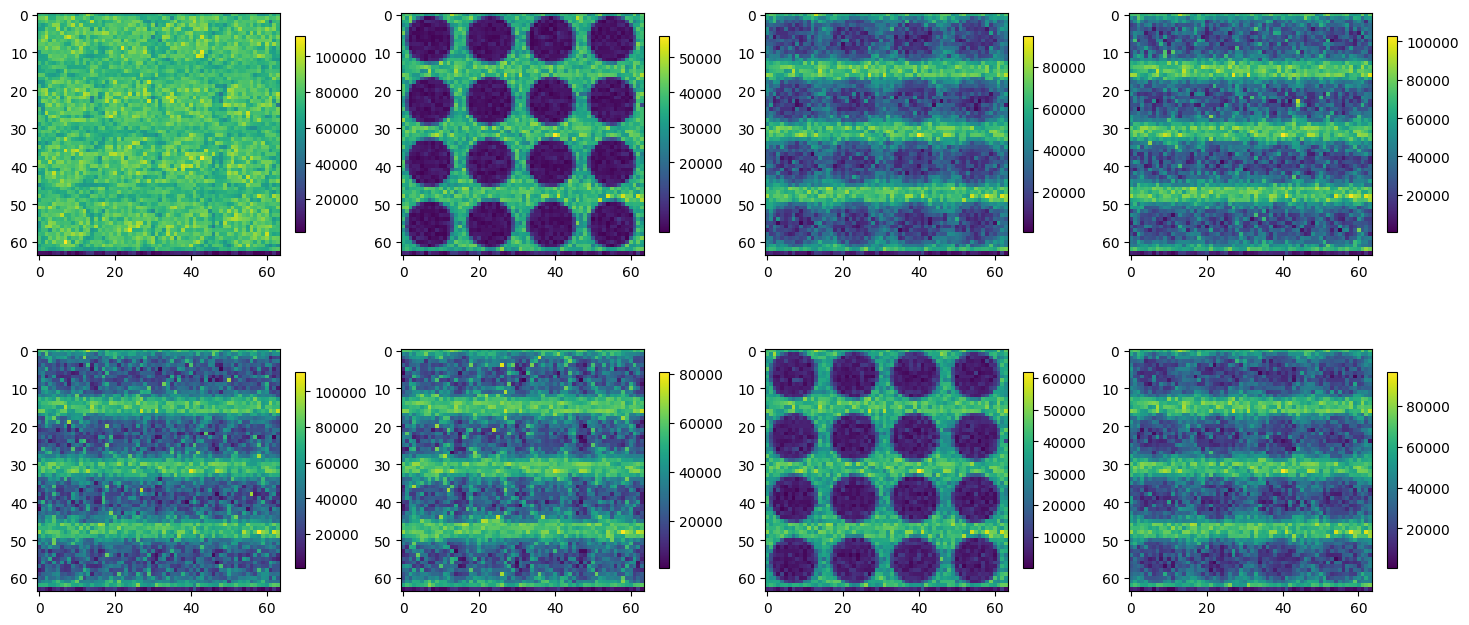

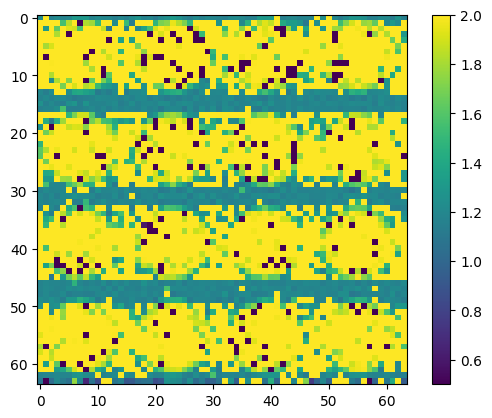

In [8]:
MOLLI_readout_img=[]
MOLLI_readout_t = np.array( [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
for i in range(8):
    MOLLI_readout_img.append(load_img(
        "../exp_result/ID31_Speed_min0.9706457925636007_max1.0",i))
        # "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA35_FOV256_K64_thick8_center_first", i))
        # "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA20_FOV320_K64_center_first", i))
        #  "../img_MOLLI/533_TR2.8_FA20_FOV320_K64_center_first_64^3",i))
        # "../img_MOLLI/533_TR2.8_FA20_FOV320_K64_center_first",i))
MOLLI_readout_img = np.asarray(MOLLI_readout_img)

# print(MOLLI_readout_img[:, 15, 15])

plt.figure(figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(MOLLI_readout_img[i])
    plt.colorbar(shrink=0.7)

T1_result = np.zeros(MOLLI_readout_img[0].shape)

for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
    # T1_star, T1, A, B = MAGIR(
    T1_star, T1, A, B = MF_MAGIR(
        MOLLI_readout_t, MOLLI_readout_img[:, x, y])
    T1_result[x, y] = T1

print(T1_result)

plt.figure()
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0.5,2)